# Titre du projet ( a décider)

## Sommaire

1. Number of games by genre.
2. Most played games.
3. Correlation between release date and ~reviews/plays.

## Introduction

Blabla

In [2]:
# Install dependencies

!pip install pandas matplotlib ipywidgets kaggle

1. Number of games by genre.
We use "Genres" columns.

In [3]:
# Loading data
import os
import pandas as pd

file_path = "Datasets/Data/backloggd_games.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.shape) # row and columns
    print(df.columns) # name/index
    df.head() # Preview

else:
    print("The file does not exist. Check the path or place the file in the correct location")

(60000, 14)
Index(['Unnamed: 0', 'Title', 'Release_Date', 'Developers', 'Summary',
       'Platforms', 'Genres', 'Rating', 'Plays', 'Playing', 'Backlogs',
       'Wishlist', 'Lists', 'Reviews'],
      dtype='object')


In [4]:
# Remove missing values, convert to string, and clean characters like [], '
all_genres = df['Genres'].dropna().astype(str).str.replace(r'[\[\]\']', '', regex=True)

# Split genres by comma, explode into rows, and strip whitespace
all_genres = all_genres.str.split(',').explode().str.strip()


# We remove empty genres 
all_genres = all_genres[all_genres != ""]


In [5]:
# Counting occurrences
genre_counts = all_genres.value_counts()
print("Number of games by genre :\n", genre_counts.head(10))

Number of games by genre :
 Genres
Adventure    19368
Indie        16816
RPG           9234
Simulator     8050
Strategy      7766
Shooter       7258
Puzzle        6935
Platform      6126
Arcade        5603
Sport         3912
Name: count, dtype: int64


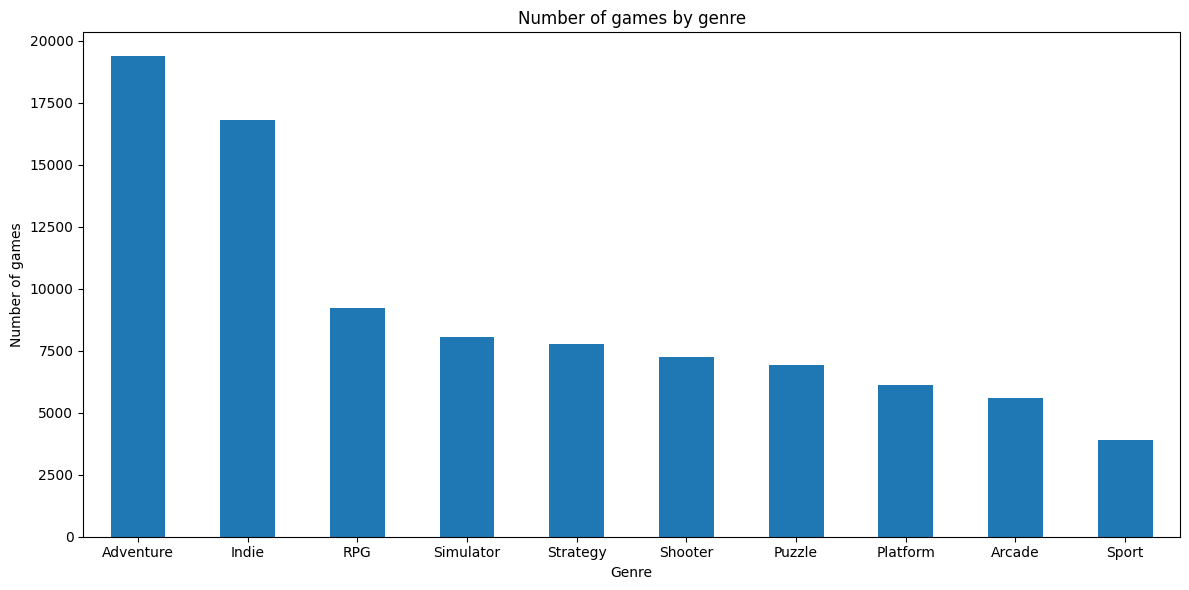

In [6]:
import matplotlib.pyplot as plt

# Graphical 
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title("Number of games by genre")
plt.xlabel("Genre")
plt.ylabel("Number of games")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


2. Most played games.
We use "Plays" and "Title" columns.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert K and M abbreviations to integers
def parse_play_count(x):
    x = str(x).replace(',', '').strip().upper()
    if x.endswith('K'):
        return int(float(x[:-1]) * 1_000)
    elif x.endswith('M'):
        return int(float(x[:-1]) * 1_000_000)
    elif x.isdigit():
        return int(x)
    else:
        return None  # to invalid values

# Parsing
df['Cumulative_number_plays'] = df['Plays'].apply(parse_play_count)

# Sort games by number of plays
top_played = df[['Title', 'Cumulative_number_plays']].sort_values(by='Cumulative_number_plays', ascending=False).head(10)
print("\nTop 10 most played games:")
print(top_played)


Top 10 most played games:
                                      Title  Cumulative_number_plays
5                                 Minecraft                  38000.0
1   The Legend of Zelda: Breath of the Wild                  35000.0
23                       Grand Theft Auto V                  35000.0
13                                 Portal 2                  34000.0
22                                   Portal                  32000.0
4                                 Undertale                  32000.0
11                                 Among Us                  29000.0
21                      Super Mario Odyssey                  29000.0
35               Super Smash Bros. Ultimate                  29000.0
56              The Elder Scrolls V: Skyrim                  26000.0


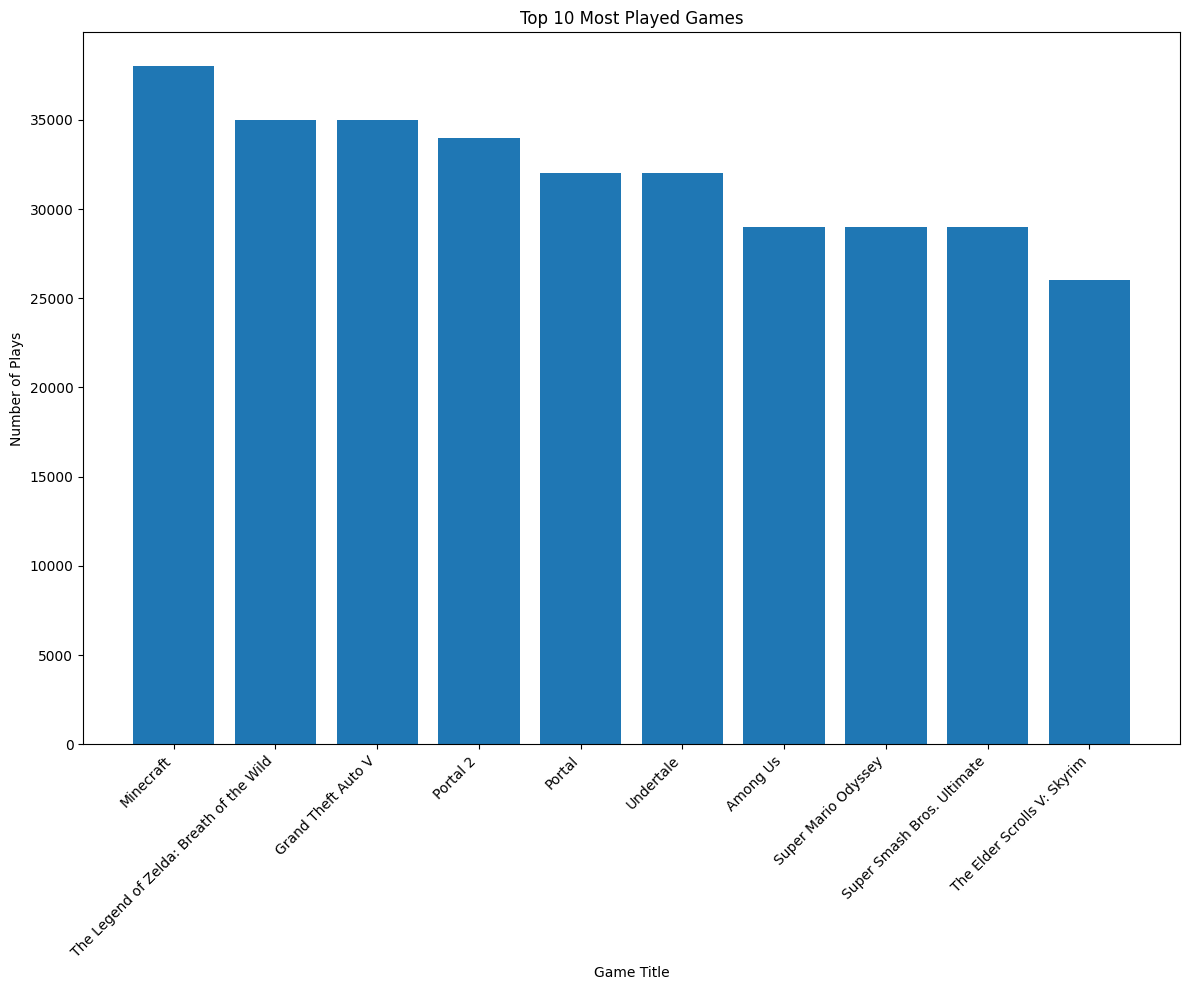

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/Data/backloggd_games.csv")

plt.figure(figsize=(12, 10))
plt.bar(top_played['Title'], top_played['Cumulative_number_plays'])
plt.title("Top 10 Most Played Games")
plt.xlabel("Game Title")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
